# APTOS 2019 Blindness Detection

## Edge Detection

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import collections
import os
from pathlib import Path
from IPython.display import Image as display_image
from IPython.display import display
print(os.listdir("../input"))

import cv2
from PIL import Image
import imagesize
from scipy import ndimage

['test.csv', 'train.csv', 'sample_submission.csv', 'train_images', 'test_images']


### data load

In [2]:
train_df = pd.read_csv("../input/train.csv")

### define function

In [3]:
def load_image(id):
    print("==============================")
    print("file name\t: {}.png".format(id))
    img_path = Path().absolute().parent / "input" / "train_images" / "{}.png".format(id)
    
    if img_path.exists():
        print("dataset\t\t: train")
        d_level = int(train_df.query("id_code == '{}'".format(id)).iloc[0, 1]) 
        diagnosis_dict = {0: "No DR", 1: "Mild", 2: "Moderate", 3: "Severe", 4: "Proliferative DR"}
        print("diagnosis\t: {} ({})".format(d_level, diagnosis_dict[d_level]))
    else:
        print("dataset\t\t: test")
        img_path = Path().absolute().parent / "input" / "test_images" / "{}.png".format(id)
        
    print("resolution\t: {}".format(imagesize.get(str(img_path))))
    print("==============================")
    return cv2.imread(str(img_path))

In [173]:
def edge_detection(file_name):
    img = load_image(file_name)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    dst = img
    dst = cv2.medianBlur(dst, ksize=7)
    _b, _g, dst = cv2.split(dst)
    plt.imshow(dst)

    _, binary = cv2.threshold(dst, np.mean(dst)/3, 255, cv2.THRESH_BINARY)
    _, binary_inv = cv2.threshold(dst, np.mean(dst)/3, 255, cv2.THRESH_BINARY_INV)
    
    plt.figure(figsize=(5, 5))
    plt.imshow(binary)
    
    sx = cv2.Sobel(binary, cv2.CV_8U, 1, 0, ksize=5)
    sy = cv2.Sobel(binary, cv2.CV_8U, 0, 1, ksize=5)
    temp = cv2.addWeighted(sx, 0.5, sy, 0.5, 1)
    
    sx = cv2.Sobel(binary_inv, cv2.CV_8U, 1, 0, ksize=5)
    sy = cv2.Sobel(binary_inv, cv2.CV_8U, 0, 1, ksize=5)
    dst = cv2.addWeighted(sx, 0.5, sy, 0.5, 1)
    
    dst = cv2.addWeighted(dst, 1, temp, 1, 1)
    
    dst = cv2.cvtColor(dst, cv2.COLOR_GRAY2RGB)
    dst = np.vstack((img_rgb, dst))
    
    plt.figure(figsize=(5, 10))
    plt.imshow(dst)

In [188]:
def edge_detection(file_name):
    img = load_image(file_name)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    dst = img
    dst = cv2.medianBlur(dst, ksize=7)
    _b, _g, dst = cv2.split(dst)

    _, binary = cv2.threshold(dst, np.mean(dst)/3, 255, cv2.THRESH_BINARY)
    
    dst = cv2.Canny(binary, 0, 100)
    
    dst = cv2.cvtColor(dst, cv2.COLOR_GRAY2RGB)
    dst = np.vstack((img_rgb, dst))
    
    plt.figure(figsize=(5, 10))
    plt.imshow(dst)

### trial section

file name	: 0167076e7089.png
dataset		: test
resolution	: (640, 480)


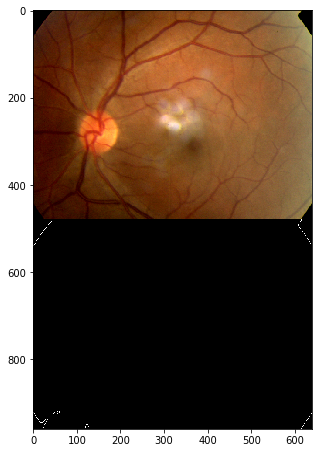

In [189]:
edge_detection("0167076e7089")

file name	: 009245722fa4.png
dataset		: test
resolution	: (640, 480)


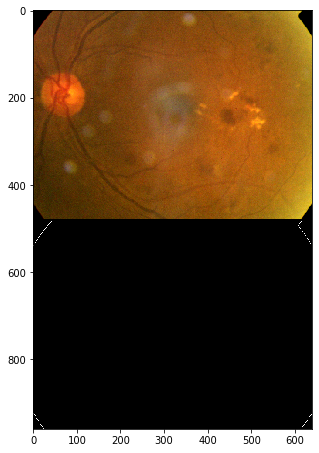

In [190]:
edge_detection("009245722fa4")

file name	: 000c1434d8d7.png
dataset		: train
diagnosis	: 2 (Moderate)
resolution	: (3216, 2136)


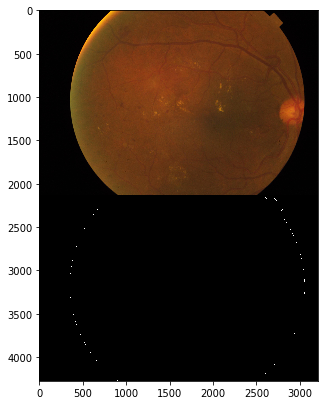

In [191]:
edge_detection("000c1434d8d7")

file name	: 0097f532ac9f.png
dataset		: train
diagnosis	: 0 (No DR)
resolution	: (2588, 1958)


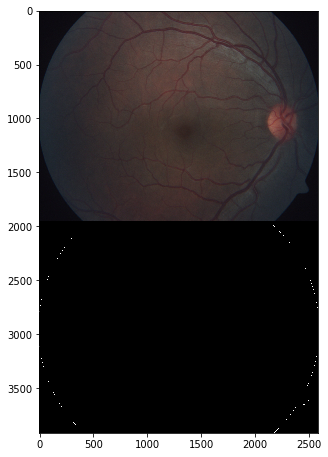

In [192]:
edge_detection("0097f532ac9f")

file name	: 00b74780d31d.png
dataset		: train
diagnosis	: 2 (Moderate)
resolution	: (2588, 1958)


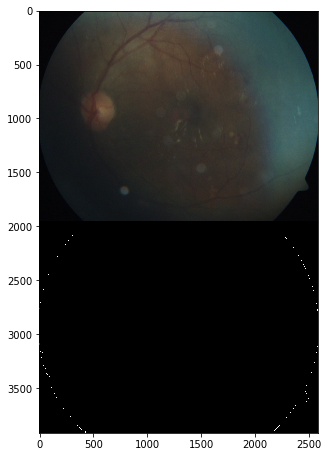

In [193]:
edge_detection("00b74780d31d")

file name	: 00cb6555d108.png
dataset		: train
diagnosis	: 1 (Mild)
resolution	: (2416, 1736)


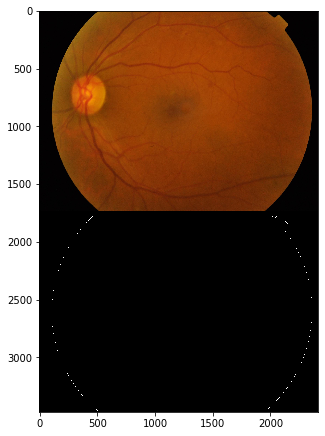

In [194]:
edge_detection("00cb6555d108")

file name	: 005b95c28852.png
dataset		: train
diagnosis	: 0 (No DR)
resolution	: (2048, 1536)


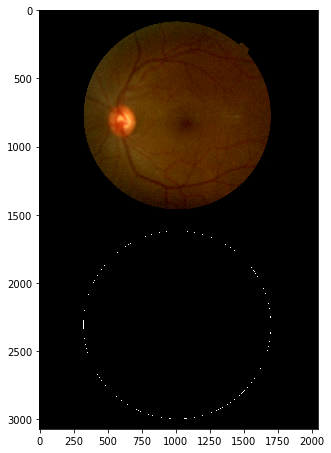

In [195]:
edge_detection("005b95c28852")

file name	: 01499815e469.png
dataset		: test
resolution	: (640, 480)


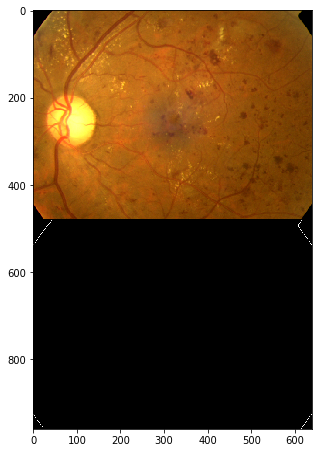

In [196]:
edge_detection("01499815e469")